In [14]:
import os
import random
import math
import numpy as np
import pandas as pd
import itertools
from collections import namedtuple
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis # you can install this library using pip
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)

In [2]:
rawfilename = "DatasetE.seq" # Your input file name with headers: SEQUENCE, LABEL (CSV format)
mySeq = pd.read_csv(rawfilename)
#mySeq.drop_duplicates(subset= "SEQUENCE", inplace= True) ##**This is an optional steps to remove duplicate sequences in your input database
print(mySeq['LABEL'].value_counts().to_dict()) #This tells you how many members are there in each class

{-1: 1252, 1: 955}


# Amino acid composition

In [4]:
apep = ['A', 'C', 'D', 'E', 'F', 'G', 'H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
aa_count=[]
filename = rawfilename+"aa-count.txt" # Your output filename
if os.path.isfile(filename) == True: # The output file will be overwritten if it exists
    os.remove(filename)
with open(filename,'a') as IN:
        IN.write(','.join(apep)  + ',LABEL'  + '\n')  
for i in range(len(mySeq)):
    eachSeqStr= mySeq.iloc[i].to_string()
    eachSeq = mySeq.SEQUENCE[i]
    seqLen = len(eachSeq)
    labelclass = mySeq.LABEL[i]
    for j in range(len(apep)):
        ap=apep[j]
        aa_count.append(str(round((eachSeq.count(ap)/seqLen),3))) #To normalize amino acid frequencies
        #aa_count.append(str(eachSeq.count(ap))) # in case you do not want to normalize with sequence length
    aa_count.append(str(labelclass))
    tmpvar = ','.join(aa_count)
    with open(filename,'a') as IN:
        IN.write(tmpvar + '\n')
    
    aa_count=[]
    aa_freq =[]

IN.close()

In [5]:
data = pd.read_csv(filename)
data.head()

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,LABEL
0,0.154,0.0,0.000,0.0,0.000,0.077,0.000,0.000,0.231,0.000,...,0.000,0.000,0.000,0.231,0.000,0.077,0.000,0.000,0.231,1
1,0.095,0.0,0.048,0.0,0.143,0.095,0.048,0.048,0.048,0.000,...,0.048,0.095,0.095,0.000,0.000,0.143,0.048,0.000,0.048,1
2,0.000,0.0,0.000,0.0,0.167,0.083,0.000,0.000,0.083,0.083,...,0.083,0.000,0.083,0.000,0.083,0.167,0.083,0.000,0.083,1
3,0.188,0.0,0.000,0.0,0.062,0.000,0.000,0.125,0.188,0.062,...,0.000,0.000,0.000,0.125,0.000,0.062,0.062,0.062,0.062,1
4,0.042,0.0,0.000,0.0,0.000,0.042,0.000,0.000,0.000,0.042,...,0.000,0.042,0.000,0.083,0.542,0.000,0.083,0.000,0.125,1


# Dipeptide and tripeptide frequencies

In [6]:
dipeptide=[]
tripeptide=[]
dipep = itertools.product('ACDEFGHIKLMNPQRSTVWY', repeat=2)
tripep= itertools.product('ACDEFGHIKLMNPQRSTVWY', repeat=3)
for x in dipep:
    s=''.join(x)
    dipeptide.append(s)
for y in tripep:
    
    tripeptide.append(''.join(y))

In [7]:
dp_count=[]
filename = rawfilename+"dipep.txt"
if os.path.isfile(filename) == True:
    os.remove(filename)
with open(filename,'a') as IN:
        IN.write(','.join(dipeptide) + ',LABEL' + '\n')  
for i in range(len(mySeq)):
    eachSeqStr= mySeq.iloc[i].to_string()
    eachSeq = mySeq.SEQUENCE[i]
    labelclass = mySeq.LABEL[i]
    seqLen = len(eachSeq)
    #calculate dipeptide frequency
    for j in range(len(dipeptide)):
        dp=dipeptide[j]
        dp_count.append(str(eachSeq.count(dp)))
        #dp_count.append(str(round((eachSeq.count(dp)/seqLen),3))) # It is not recommended to normalize the dp/tp frequences since it is sparse matrix. but if you want to normalize all counts you perform this step
    dp_count.append(str(labelclass))                    
    tmpvar = ','.join(dp_count)
    with open(filename,'a') as IN:
        IN.write(tmpvar + '\n')
    
    dp_count=[]
IN.close()    

In [8]:
data = pd.read_csv(filename)
data.head()

,AA,AC,AD,AE,AF,AG,AH,AI,AK,AL,...,YN,YP,YQ,YR,YS,YT,YV,YW,YY,LABEL
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,1
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,1


In [9]:
tripep_count=[]
filename = rawfilename+"tripep.txt"

if os.path.isfile(filename) == True:
    os.remove(filename)
with open(filename,'a') as IN:
        IN.write(','.join(tripeptide)  + ',LABEL' + '\n')  
for i in range(len(mySeq)):
    eachSeqStr= mySeq.iloc[i].to_string()
    eachSeq = mySeq.SEQUENCE[i]
    labelclass = mySeq.LABEL[i]
    seqLen = len(eachSeq)
    #calculate dipeptide frequency
    for j in range(len(tripeptide)):
        tp=tripeptide[j]
        tripep_count.append(str(eachSeq.count(tp)))
        #tripep_count.append(str(round((eachSeq.count(dp)/seqLen),3))) # It is not recommended to normalize the dp/tp frequences since it is sparse matrix; but if you want to normalize all counts you perform this step
    tripep_count.append(str(labelclass))                    
    tmpvar = ','.join(tripep_count)
    with open(filename,'a') as IN:
        IN.write(tmpvar + '\n')
    
    tripep_count=[]
IN.close()

In [10]:
data = pd.read_csv(filename)
data.head()

,AAA,AAC,AAD,AAE,AAF,AAG,AAH,AAI,AAK,AAL,...,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY,LABEL
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Biochemical properties

In [11]:
# Only few basic biochemical properties are calculated here. There are many more property calculation tools/modules online like propy
features_pep = ["net_charge","IsoelectricPoint","Hbdonors","Hbacceptors","HbDonorAcceptorDiff","hydropathy","MolWt","SS_B","SS_T","SS_H"]
tmpARR = []
filename = rawfilename+"BCP.txt"
if os.path.isfile(filename) == True:
    os.remove(filename)
with open(filename, 'a') as IN:
    IN.write(','.join(features_pep) + ',LABEL' + '\n')
for i in range(len(mySeq)):
    eachSeqStr= mySeq.iloc[i].to_string()
    eachSeq = mySeq.SEQUENCE[i]
    LABEL = mySeq.LABEL[i]
    seqLen = len(eachSeq)
    #** if your sequence has non-standard amino acids, they are been replaced with closest amino acid
    #** Please be careful while using following replacements, you may want to delete the entries with non-std amino acids or replace them with other closest amino acids
    eachSeq=eachSeq.replace('B','N') 
    eachSeq=eachSeq.replace('Z','Q')
    eachSeq=eachSeq.replace('J','I')
    eachSeq=eachSeq.replace('X','G')
    eachSeq=eachSeq.replace('m','')
    
    positive_aa_R= eachSeq.count('R');positive_aa_K= eachSeq.count('K'); negative_aa_D= eachSeq.count('D'); negative_aa_E= eachSeq.count('E'); aromaticnumW = eachSeq.count('W'); aromaticnumY = eachSeq.count('Y'); aromaticnumF = eachSeq.count('F'); count_aa_A = eachSeq.count('A'); count_aa_C = eachSeq.count('C'); count_aa_G = eachSeq.count('G'); count_aa_H = eachSeq.count('H'); count_aa_I = eachSeq.count('I'); count_aa_L = eachSeq.count('L'); count_aa_M = eachSeq.count('M'); count_aa_N = eachSeq.count('N');count_aa_P = eachSeq.count('P'); count_aa_Q = eachSeq.count('Q');count_aa_S = eachSeq.count('S'); count_aa_T = eachSeq.count('T');count_aa_V = eachSeq.count('V');
    net_charge = (positive_aa_R+positive_aa_K-negative_aa_D-negative_aa_E)/seqLen
    PI = ProteinAnalysis(eachSeq).isoelectric_point()
    Hbdonors = (positive_aa_R*5 + count_aa_Q*2 + count_aa_S + count_aa_T + count_aa_H*2 + positive_aa_K*3 + aromaticnumW + aromaticnumY+ count_aa_N*2)/seqLen
    Hbacceptors = (count_aa_N*2 + negative_aa_D*4 + count_aa_Q*2 + negative_aa_E*4 + count_aa_H*2 + count_aa_S*2 + count_aa_T*2 + aromaticnumY)/seqLen
    Hbdonaccdiff = (Hbdonors-Hbacceptors)/seqLen
    SS = ProteinAnalysis(eachSeq).secondary_structure_fraction() #: [Sheet, Turn, Helix].***not in the matrix yet   
    hydropathy = ProteinAnalysis(eachSeq).gravy()
    MW = ProteinAnalysis(eachSeq).molecular_weight()
    MW = MW/seqLen
    for j in [net_charge,PI,Hbdonors,Hbacceptors,Hbdonaccdiff,hydropathy,MW,SS[0],SS[1],SS[2]]:
        tmpARR.append(str(round(j,5)))
    tmpARR.append(str(LABEL))
    tmpvar = ','.join(tmpARR)
    with open(filename,'a') as IN:
        IN.write(tmpvar + '\n')
    tmpARR = []
IN.close()    

In [12]:
data = pd.read_csv(filename)
data.head()

,net_charge,IsoelectricPoint,Hbdonors,Hbacceptors,HbDonorAcceptorDiff,hydropathy,MolWt,SS_B,SS_T,SS_H,LABEL
0,0.46154,10.63727,2.15385,0.38462,0.13609,-2.04615,127.76307,0.23077,0.07692,0.15385,1
1,0.00000,6.74274,0.71429,0.90476,-0.00907,-0.37143,111.40757,0.28571,0.23810,0.09524,1
2,0.08333,9.52826,0.91667,0.91667,0.00000,-0.10000,116.29646,0.41667,0.25000,0.08333,1
3,0.31250,11.16608,1.37500,0.18750,0.07422,0.10000,122.77512,0.43750,0.00000,0.25000,1
4,0.08333,9.69659,1.08333,1.20833,-0.00521,-0.47083,103.69063,0.25000,0.62500,0.08333,1


# Plotting property distributions

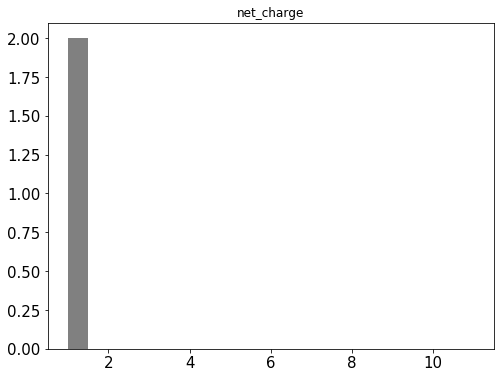

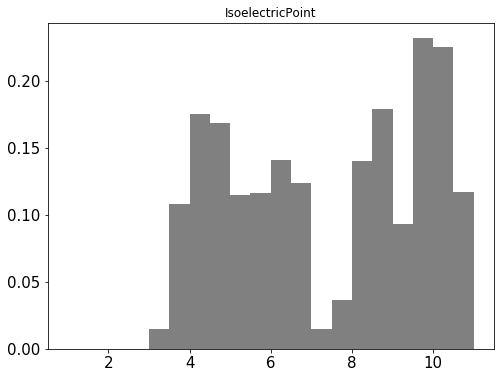

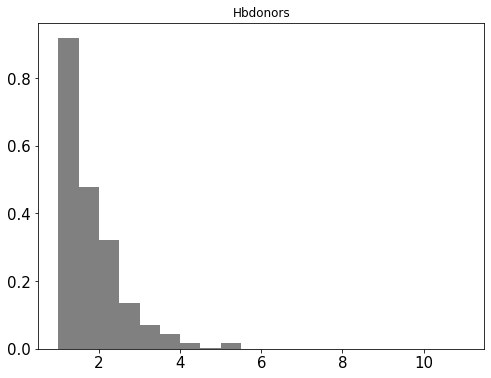

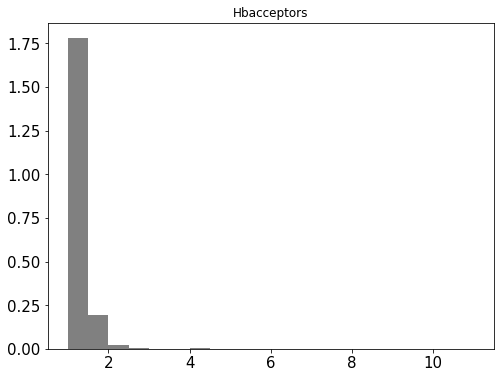

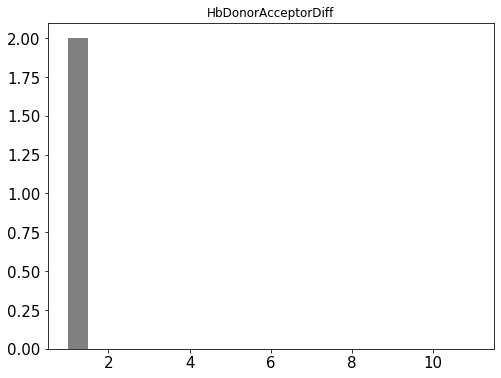

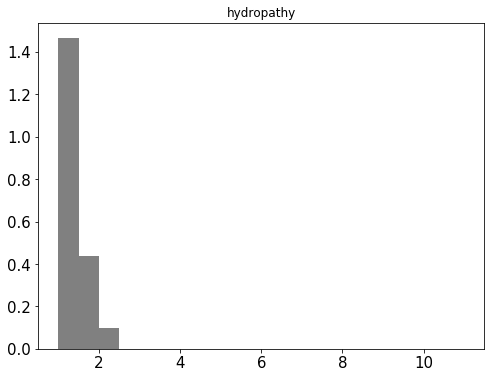

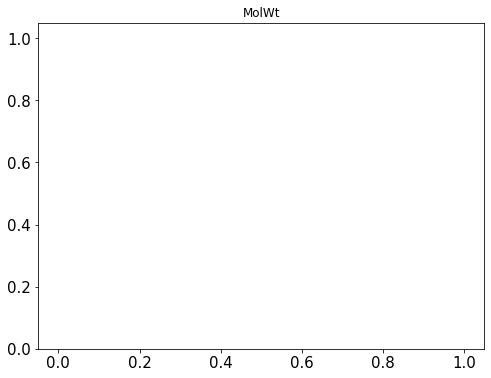

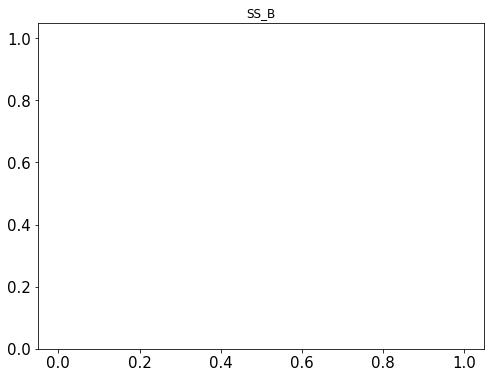

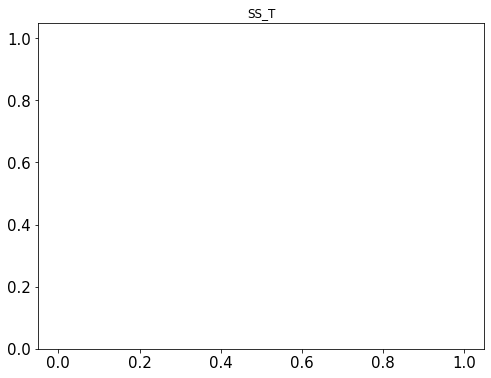

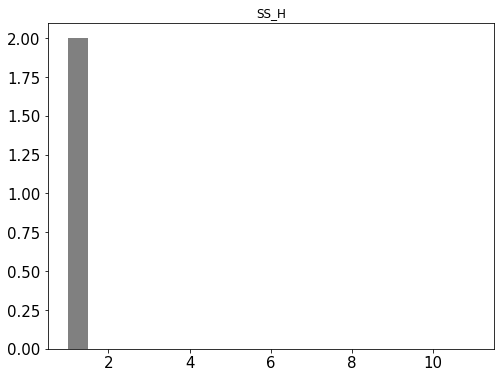

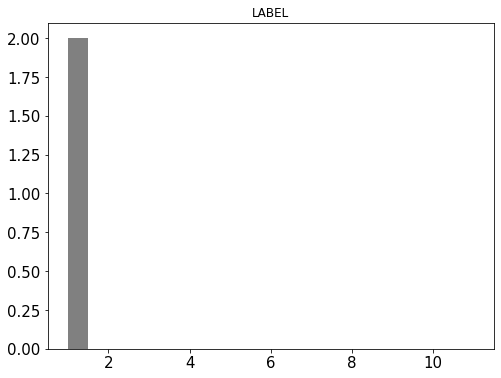

In [17]:
data = pd.read_csv(filename)
for i in data.columns:
    data.hist(i,bins=20,density=True,grid=False, histtype='bar',align='mid',color= 'grey', range=(1,11), xlabelsize=15,ylabelsize=15,figsize=(8,6))
    #plt.savefig('aa_'+i+'.png',bbox_inches = 'tight'); #*One can you use this option to save all figures as png